*2024/11/12*
***
# 多层感知机
## 1 模型选择、欠拟合和过拟合

如何发现可以泛化的模式是机器学习的根本问题。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为*过拟合*（overfitting），用于对抗过拟合的技术称为*正则化*（regularization）。

如果有足够多的神经元、层数和训练迭代周期，模型最终可以在训练集上达到完美的精度，此时测试集的准确性却下降了。

### 1.1 训练误差和泛化误差

*训练误差*（training error）是指，模型在训练数据集上计算得到的误差。

*泛化误差*（generalization error）是指，模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

假设训练数据和测试数据都是从相同的分布中独立提取的。被称为*独立同分布假设*（i.i.d. assumption），这意味着对数据进行采样的过程没有进行“记忆”。

当我们训练模型时，我们试图找到一个能够尽可能拟合训练数据的函数。但是如果它执行地“太好了”，而不能对看不见的数据做到很好泛化，就会导致过拟合。这种情况正是我们想要避免或控制的。

深度学习中有许多启发式的技术旨在防止过拟合。

几个倾向于影响模型泛化的因素:

1. 可调整参数的数量。当可调整参数的数量（有时称为*自由度*）很大时，模型往往更容易过拟合。

2. 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。

3. 训练样本的数量。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 1.2 模型选择

#### 1.2.1 验证集

原则上，在我们确定所有的超参数之前，我们不希望用到测试集。如果我们在模型选择过程中使用测试数据，可能会有过拟合测试数据的风险。

解决此问题的常见做法是将我们的数据分成三份，除了训练和测试数据集之外，还增加一个*验证数据集*（validation dataset），也叫*验证集*（validation set）。

#### 1.2.2 <mark>$K$折交叉验证</mark>

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。这个问题的一个流行的解决方案是采用$K$*折交叉验证*。这里，原始训练数据被分成$K$个不重叠的子集。然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。最后，通过对$K$次实验的结果取平均来估计训练和验证误差。

### 1.3 欠拟合、过拟合

**过拟合**并不总是一件坏事。特别是在深度学习领域，众所周知，最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多。最终，我们通常更关心验证误差，而不是训练误差和验证误差之间的差距。

#### 1.3.1 模型复杂性

多项式的阶数和欠拟合与过拟合之间的关系。

![模型复杂度对欠拟合和过拟合的影响](https://raw.githubusercontent.com/KeKeoor/DeepLearning_notes/refs/heads/main/img/capacity-vs-error.svg)

#### 1.3.2 数据及大小

另一个重要因素是数据集的大小。训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。随着训练数据量的增加，泛化误差通常会减小。

此外，一般来说，更多的数据不会有什么坏处。对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。给出更多的数据，我们可能会尝试拟合一个更复杂的模型。能够拟合更复杂的模型可能是有益的。

如果没有足够的数据，简单的模型可能更有用。对于许多任务，深度学习只有在有数千个训练样本时才优于线性模型。从一定程度上来说，深度学习目前的兴盛要归功于廉价存储、互联设备以及数字化经济带来的海量数据集。

### 1.4 多项式回归

暂无

## 2 权重衰减
### 2.1 范数与权重衰减

在训练参数化机器学习模型时，*权重衰减*（weight decay）是最广泛使用的正则化的技术之一，它通常也被称为$L_2$*正则化*。这项技术通过函数与零的距离来衡量函数的复杂度。

通过线性函数$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$中的权重向量的某个范数来度量其复杂性，例如$\| \mathbf{w} \|^2$。要保证权重向量比较小，最常用方法是将其范数作为惩罚项加到最小化损失的问题中。将原来的训练目标*最小化训练标签上的预测损失*，调整为*最小化预测损失和惩罚项之和*。现在，如果我们的权重向量增长的太大，我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。

损失如下式所示：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

为了惩罚权重向量的大小，在损失函数中添加$\| \mathbf{w} \|^2$。通过*正则化常数*$\lambda$来描述这种权衡，这是一个非负超参数。

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

对于$\lambda = 0$，我们恢复了原来的损失函数。对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。

$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为*套索回归*（lasso regression）。使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。在实践中，这可能使它们对单个变量中的观测误差更为稳定。相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，而将其他权重清除为零。这称为*特征选择*（feature selection），这可能是其他场景下需要的。

$L_2$正则化回归的小批量随机梯度下降更新如下式：

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。较小的$\lambda$值对应较少约束的$\mathbf{w}$，而较大的$\lambda$值对$\mathbf{w}$的约束更大。

通常，网络输出层的偏置项不会被正则化。

### 2.2 高维线性回归


In [11]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先生成一些数据：

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ , 其中 } \epsilon \sim \mathcal{N}(0, 0.01^2).$$

选择标签是关于输入的线性函数。标签同时被均值为0，标准差为0.01高斯噪声破坏。为了使过拟合的效果更加明显，可以将问题的维数增加到$d = 200$，并使用一个只包含20个样本的小训练集。

In [12]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 2.2.1 实现

将$L_2$的平方惩罚添加到原始目标函数中。

In [13]:
def init_params():
    """
    初始化模型参数
    :return:
    """
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [14]:
def l2_penalty(w):
    """
    L2范数惩罚
    :param w:
    :return:
    """
    return torch.sum(w.pow(2)) / 2

In [15]:
def train(lambd):
    """
    训练模型
    :param lambd:
    :return:
    """
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.126646995544434


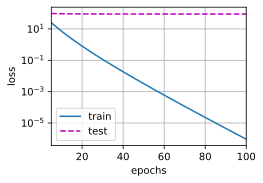

In [16]:
# 忽略正则化直接训练
train(lambd=0)

w的L2范数是： 0.3706141412258148


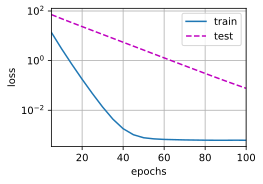

In [17]:
# 使用权重衰减
train(lambd=3)

### 2.2.2 简洁实现

In [18]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.432432174682617


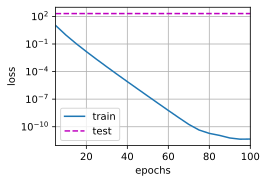

In [19]:
train_concise(0)

w的L2范数： 0.36453789472579956


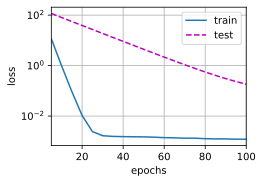

In [20]:
train_concise(3)